# 0. 安装必要的库，这里已经显示安装好

In [2]:
# !pip install NJmatML
# !pip install matplotlib
# !pip install sklearn
# !pip install scikit-learn
# !pip install pandas 
# !pip install gplearn 
# !pip install imblearn 
# !pip install numpy
# !pip install seaborn
# !pip install xgboost
from NJmatML import dataML 
import warnings
warnings.filterwarnings("ignore")

# 1. file_name打开的文件名可视化pandas数据
#### data是csv倒入时的数据集
#### data_rfe在后面会有，是rfe特征选择后的总数据集
#### t是rfe特征选择后的特征数据
#### target是rfe特征选择后的目标数据

     A1 NumberofProtons  A2 NumberofProtons  B NumberofProtons  \
0                     3                   3                 32   
1                    11                  11                 32   
2                    19                  19                 32   
3                    37                  37                 32   
4                    55                  55                 32   
..                  ...                 ...                ...   
300                  19                  19                 29   
301                  19                  19                 26   
302                  19                  19                 12   
303                  19                  19                 25   
304                  19                  19                 28   

     X1 NumberofProtons  X2 NumberofProtons  X3 NumberofProtons  \
0                     9                   9                   9   
1                     9                   9                   9   
2     

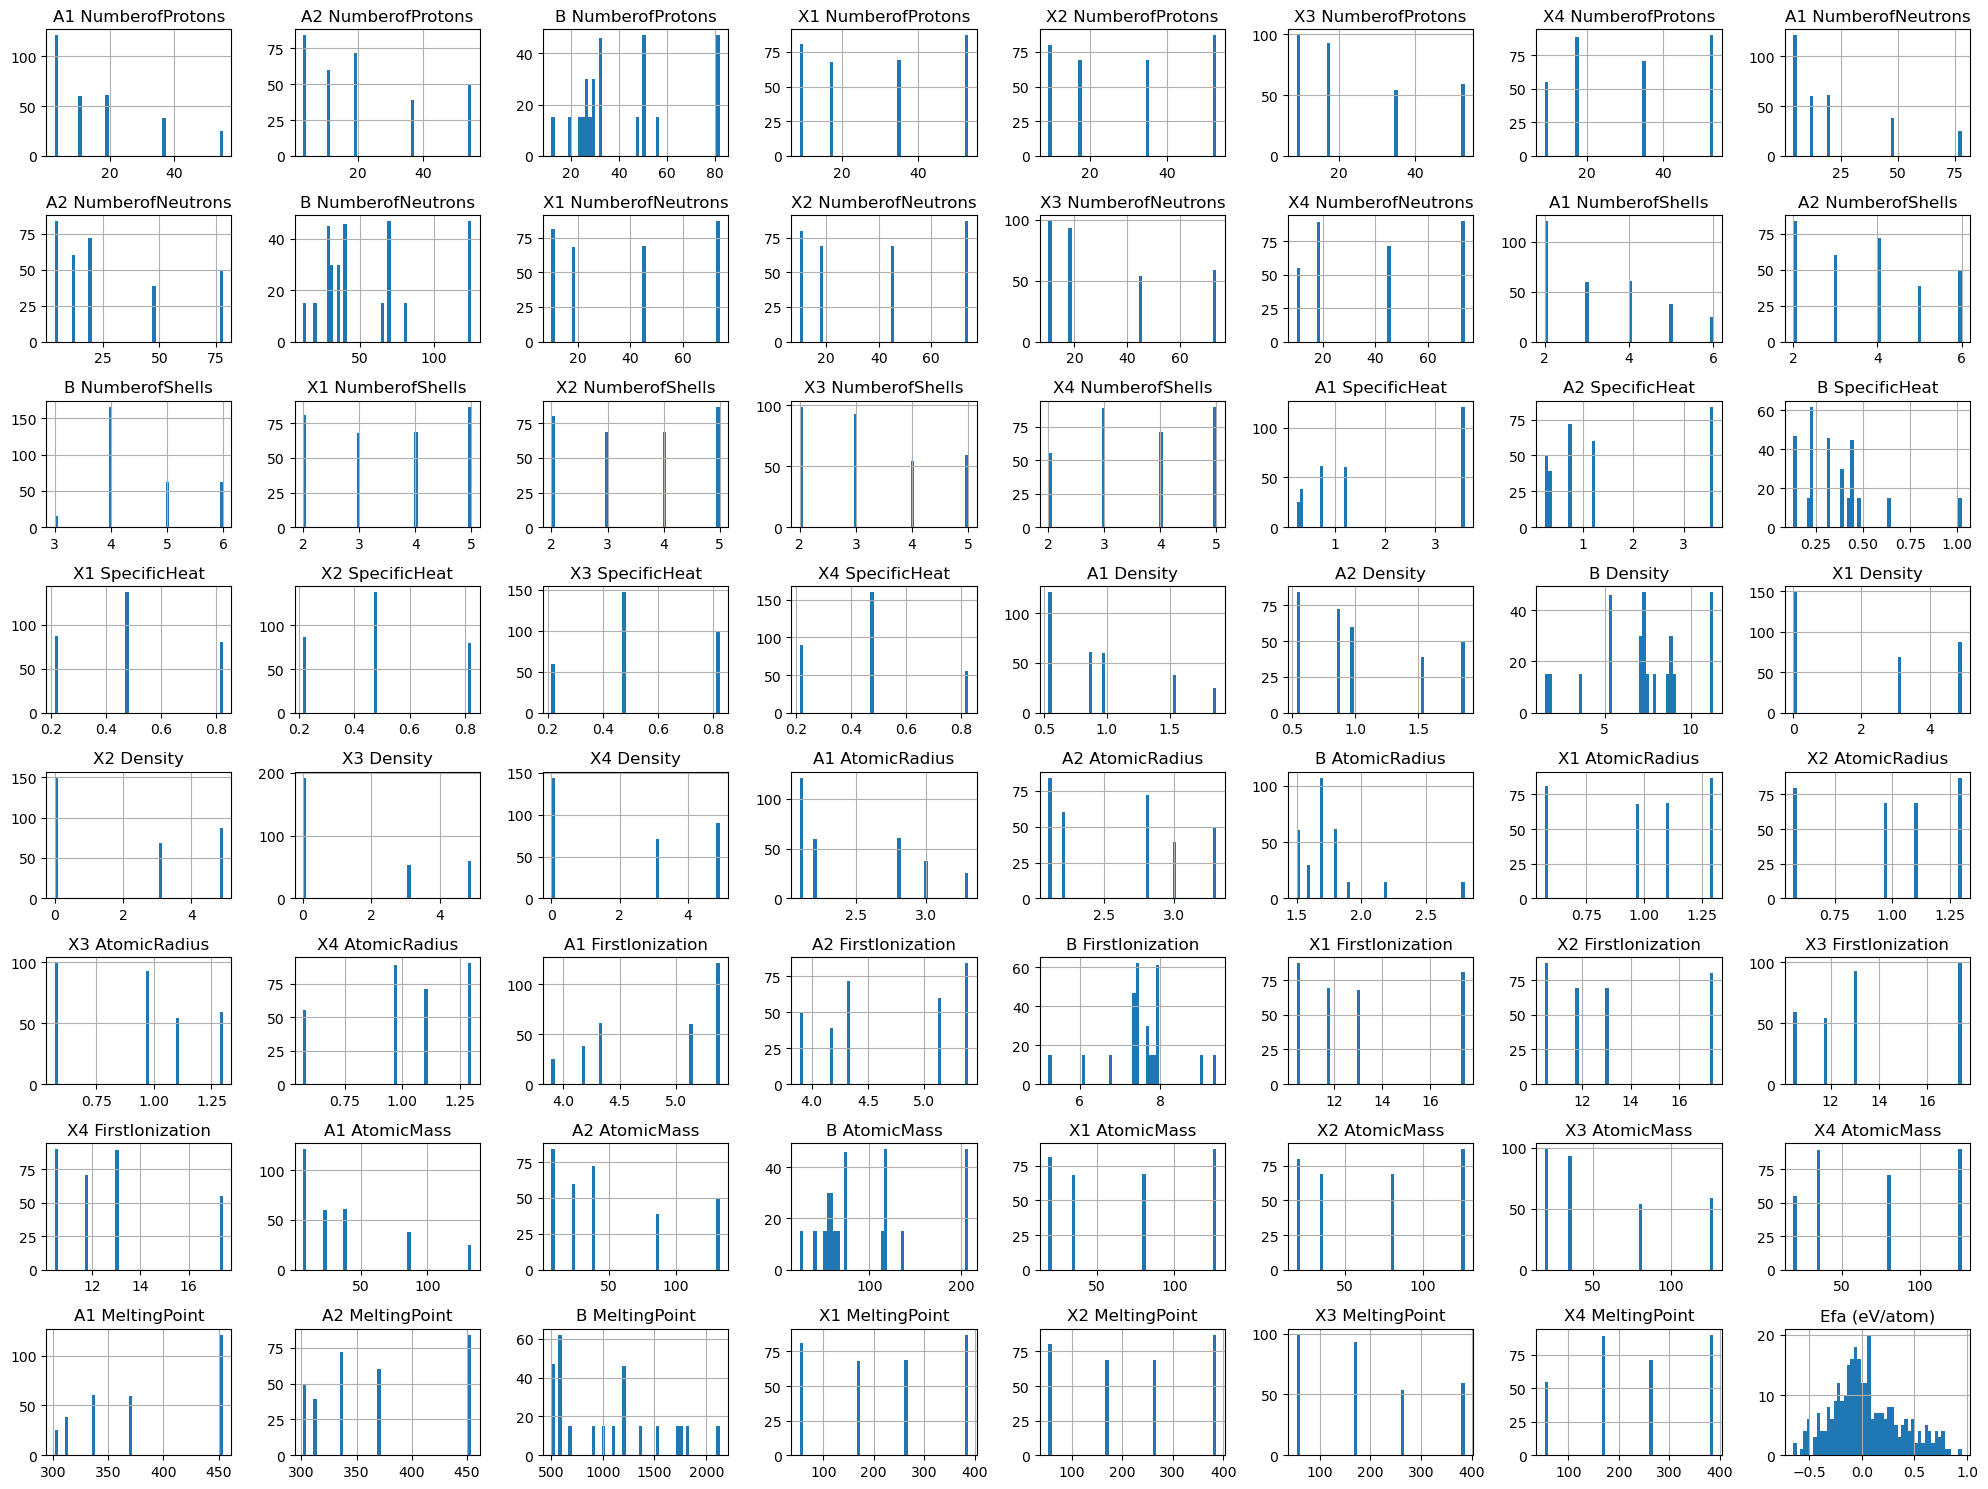

In [4]:
dataML.file_name('2DEformationCleaned.csv') #打开csv并存到data中
dataML.hist()  #画所有列分布的柱状图，例如potential 在0.3 V最多

# 2. 封装函数特征选择之前heatmap画热图

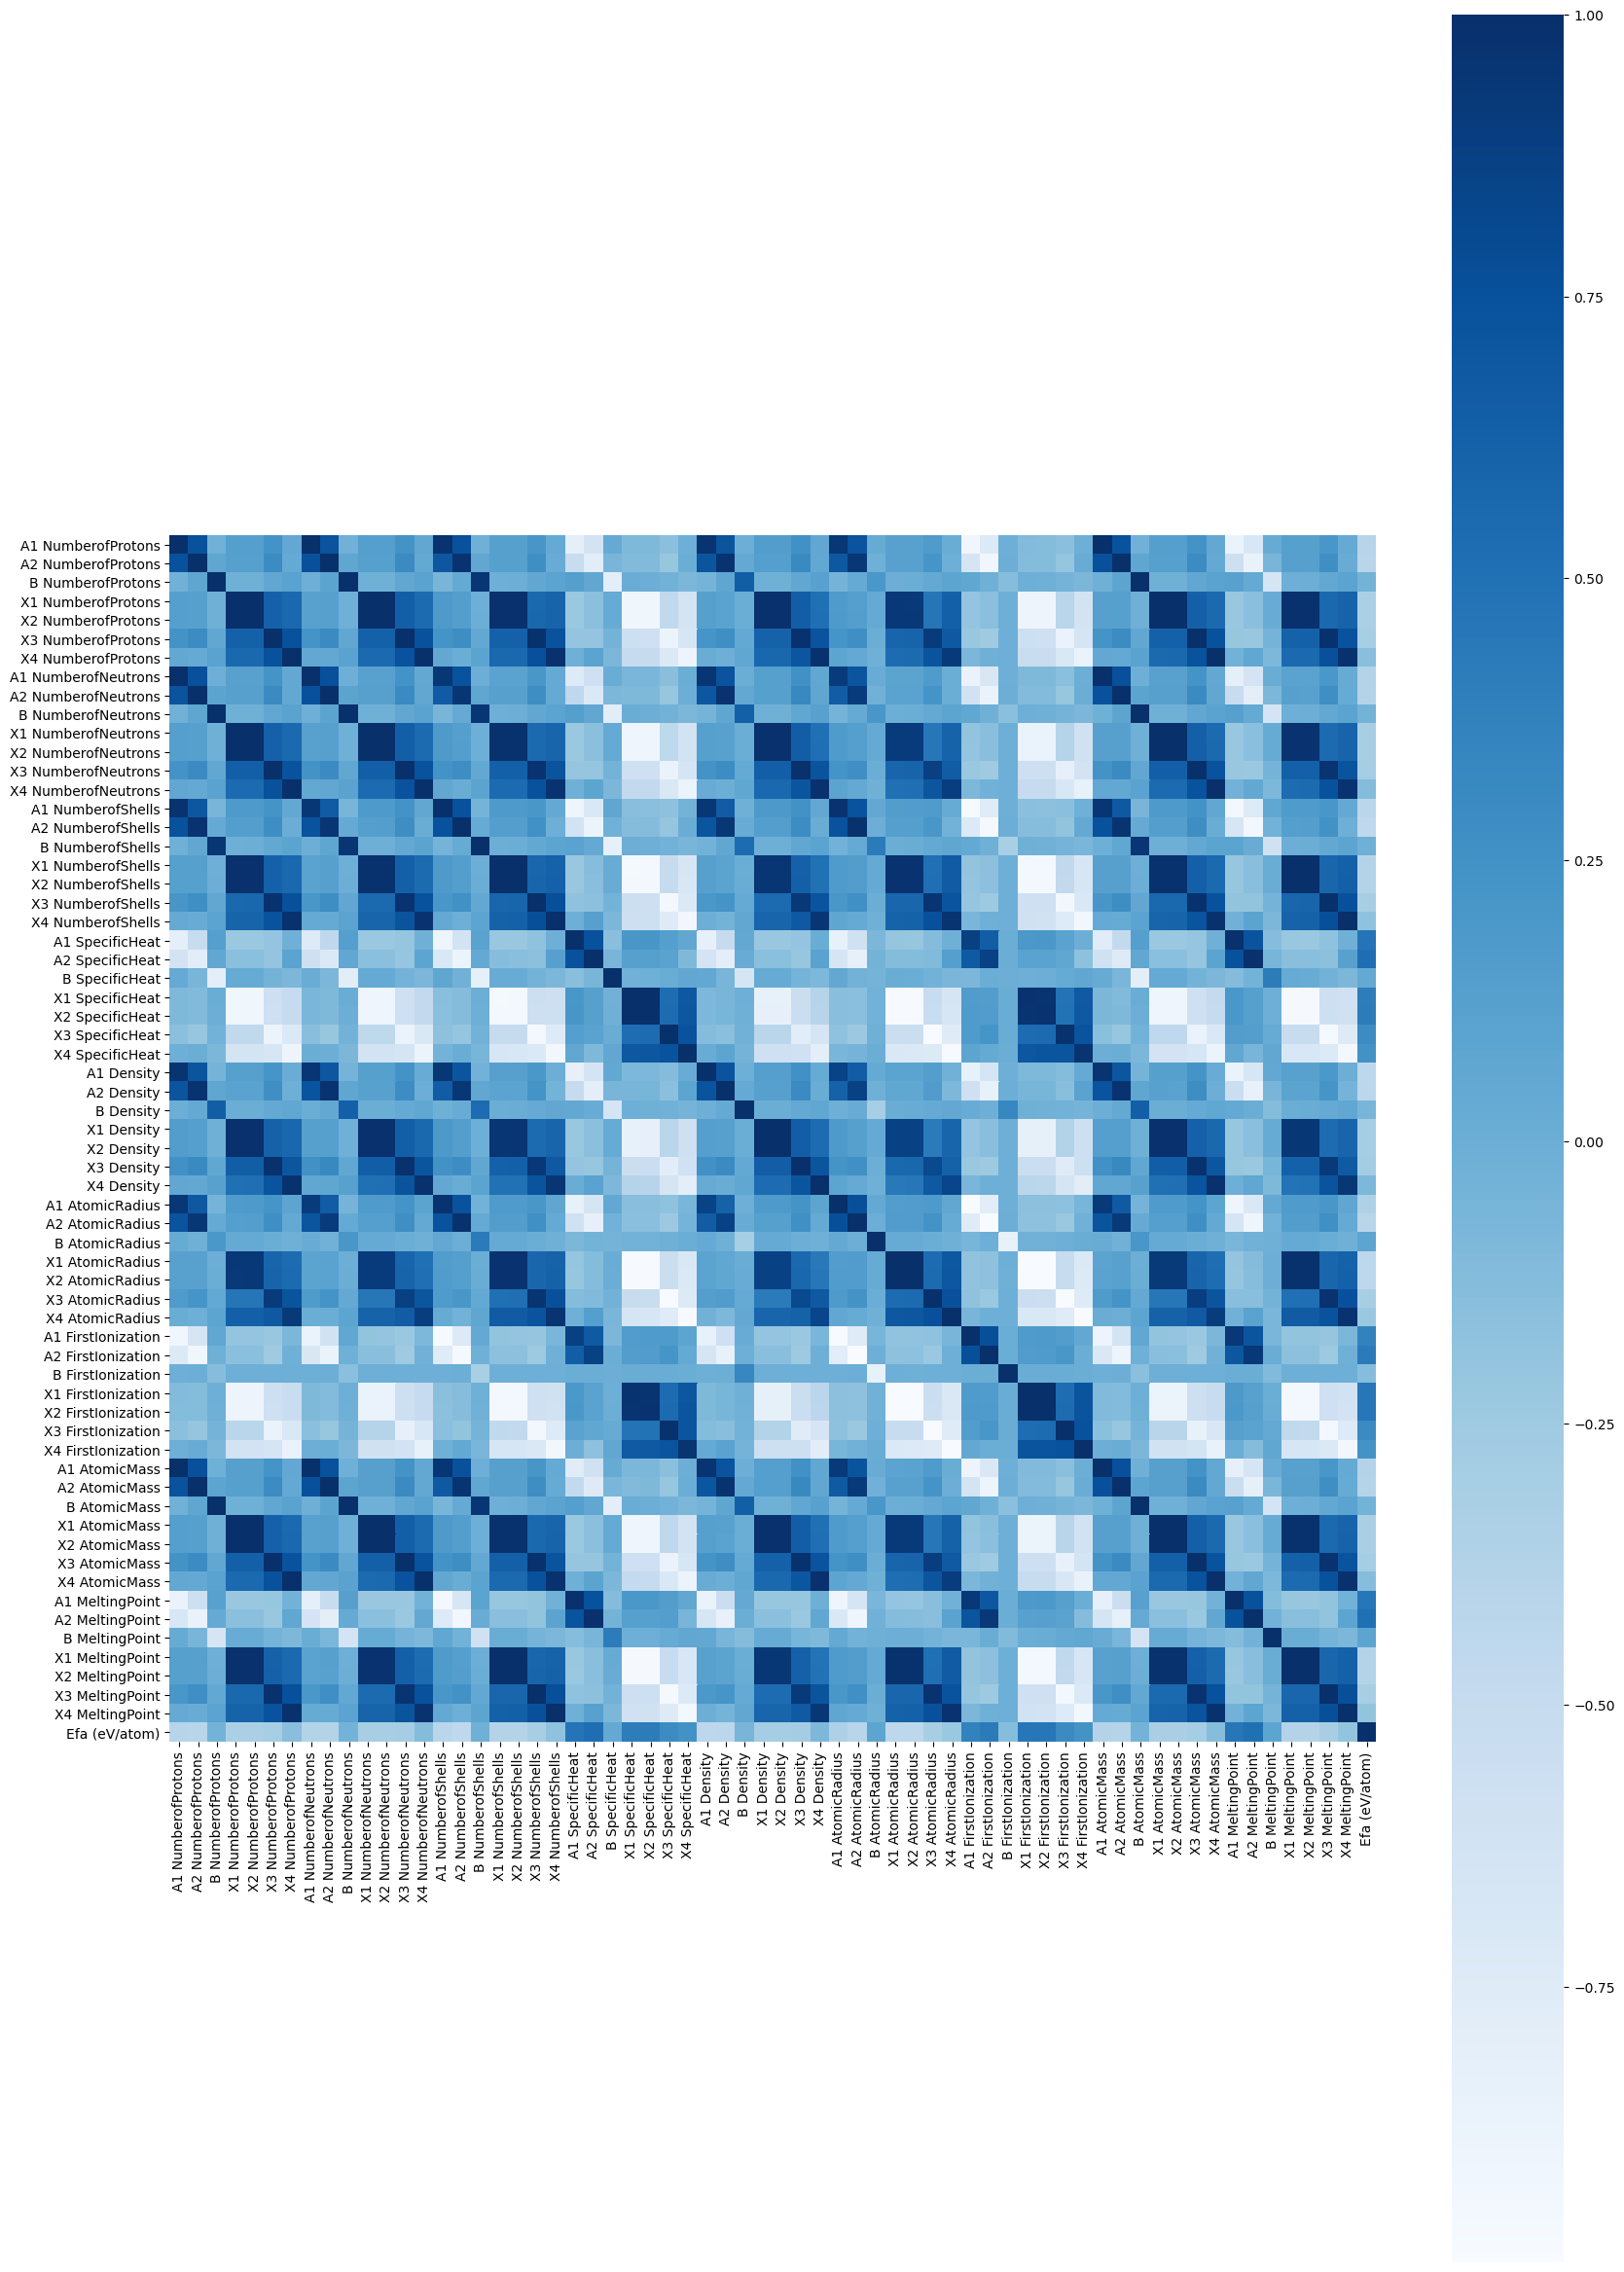

In [5]:
dataML.heatmap_before() #画封装函数特征选择之前heatmap热图

# 3. rfe特征选择

In [6]:
dataML.feature_rfe_select1(23)   #20为希望最后剩余的特征数目，可以自行改变

特征是否被选中：
 [False  True  True False  True  True False False False False False False
 False False False False False False False False False  True  True False
  True  True False False  True  True  True False False False False False
  True  True False  True False  True False  True  True False  True False
  True False  True False False False False False False  True  True False
 False False  True]
获取的数据特征尺寸: (305, 23)
最后的特征s_rfe: ['A2 NumberofProtons' 'B NumberofProtons' 'X2 NumberofProtons'
 'X3 NumberofProtons' 'A1 SpecificHeat' 'A2 SpecificHeat'
 'X1 SpecificHeat' 'X2 SpecificHeat' 'A1 Density' 'A2 Density' 'B Density'
 'A2 AtomicRadius' 'B AtomicRadius' 'X2 AtomicRadius' 'X4 AtomicRadius'
 'A2 FirstIonization' 'B FirstIonization' 'X2 FirstIonization'
 'X4 FirstIonization' 'A2 AtomicMass' 'A2 MeltingPoint' 'B MeltingPoint'
 'X4 MeltingPoint']
目标target:      Efa (eV/atom)
0         0.817268
1         0.468555
2         0.457779
3         0.305243
4         0.080708
..             ...
300  

# 4 画rfe特征选择后的热图和pairplot图
## 4.1 画rfe特征选择后的热图

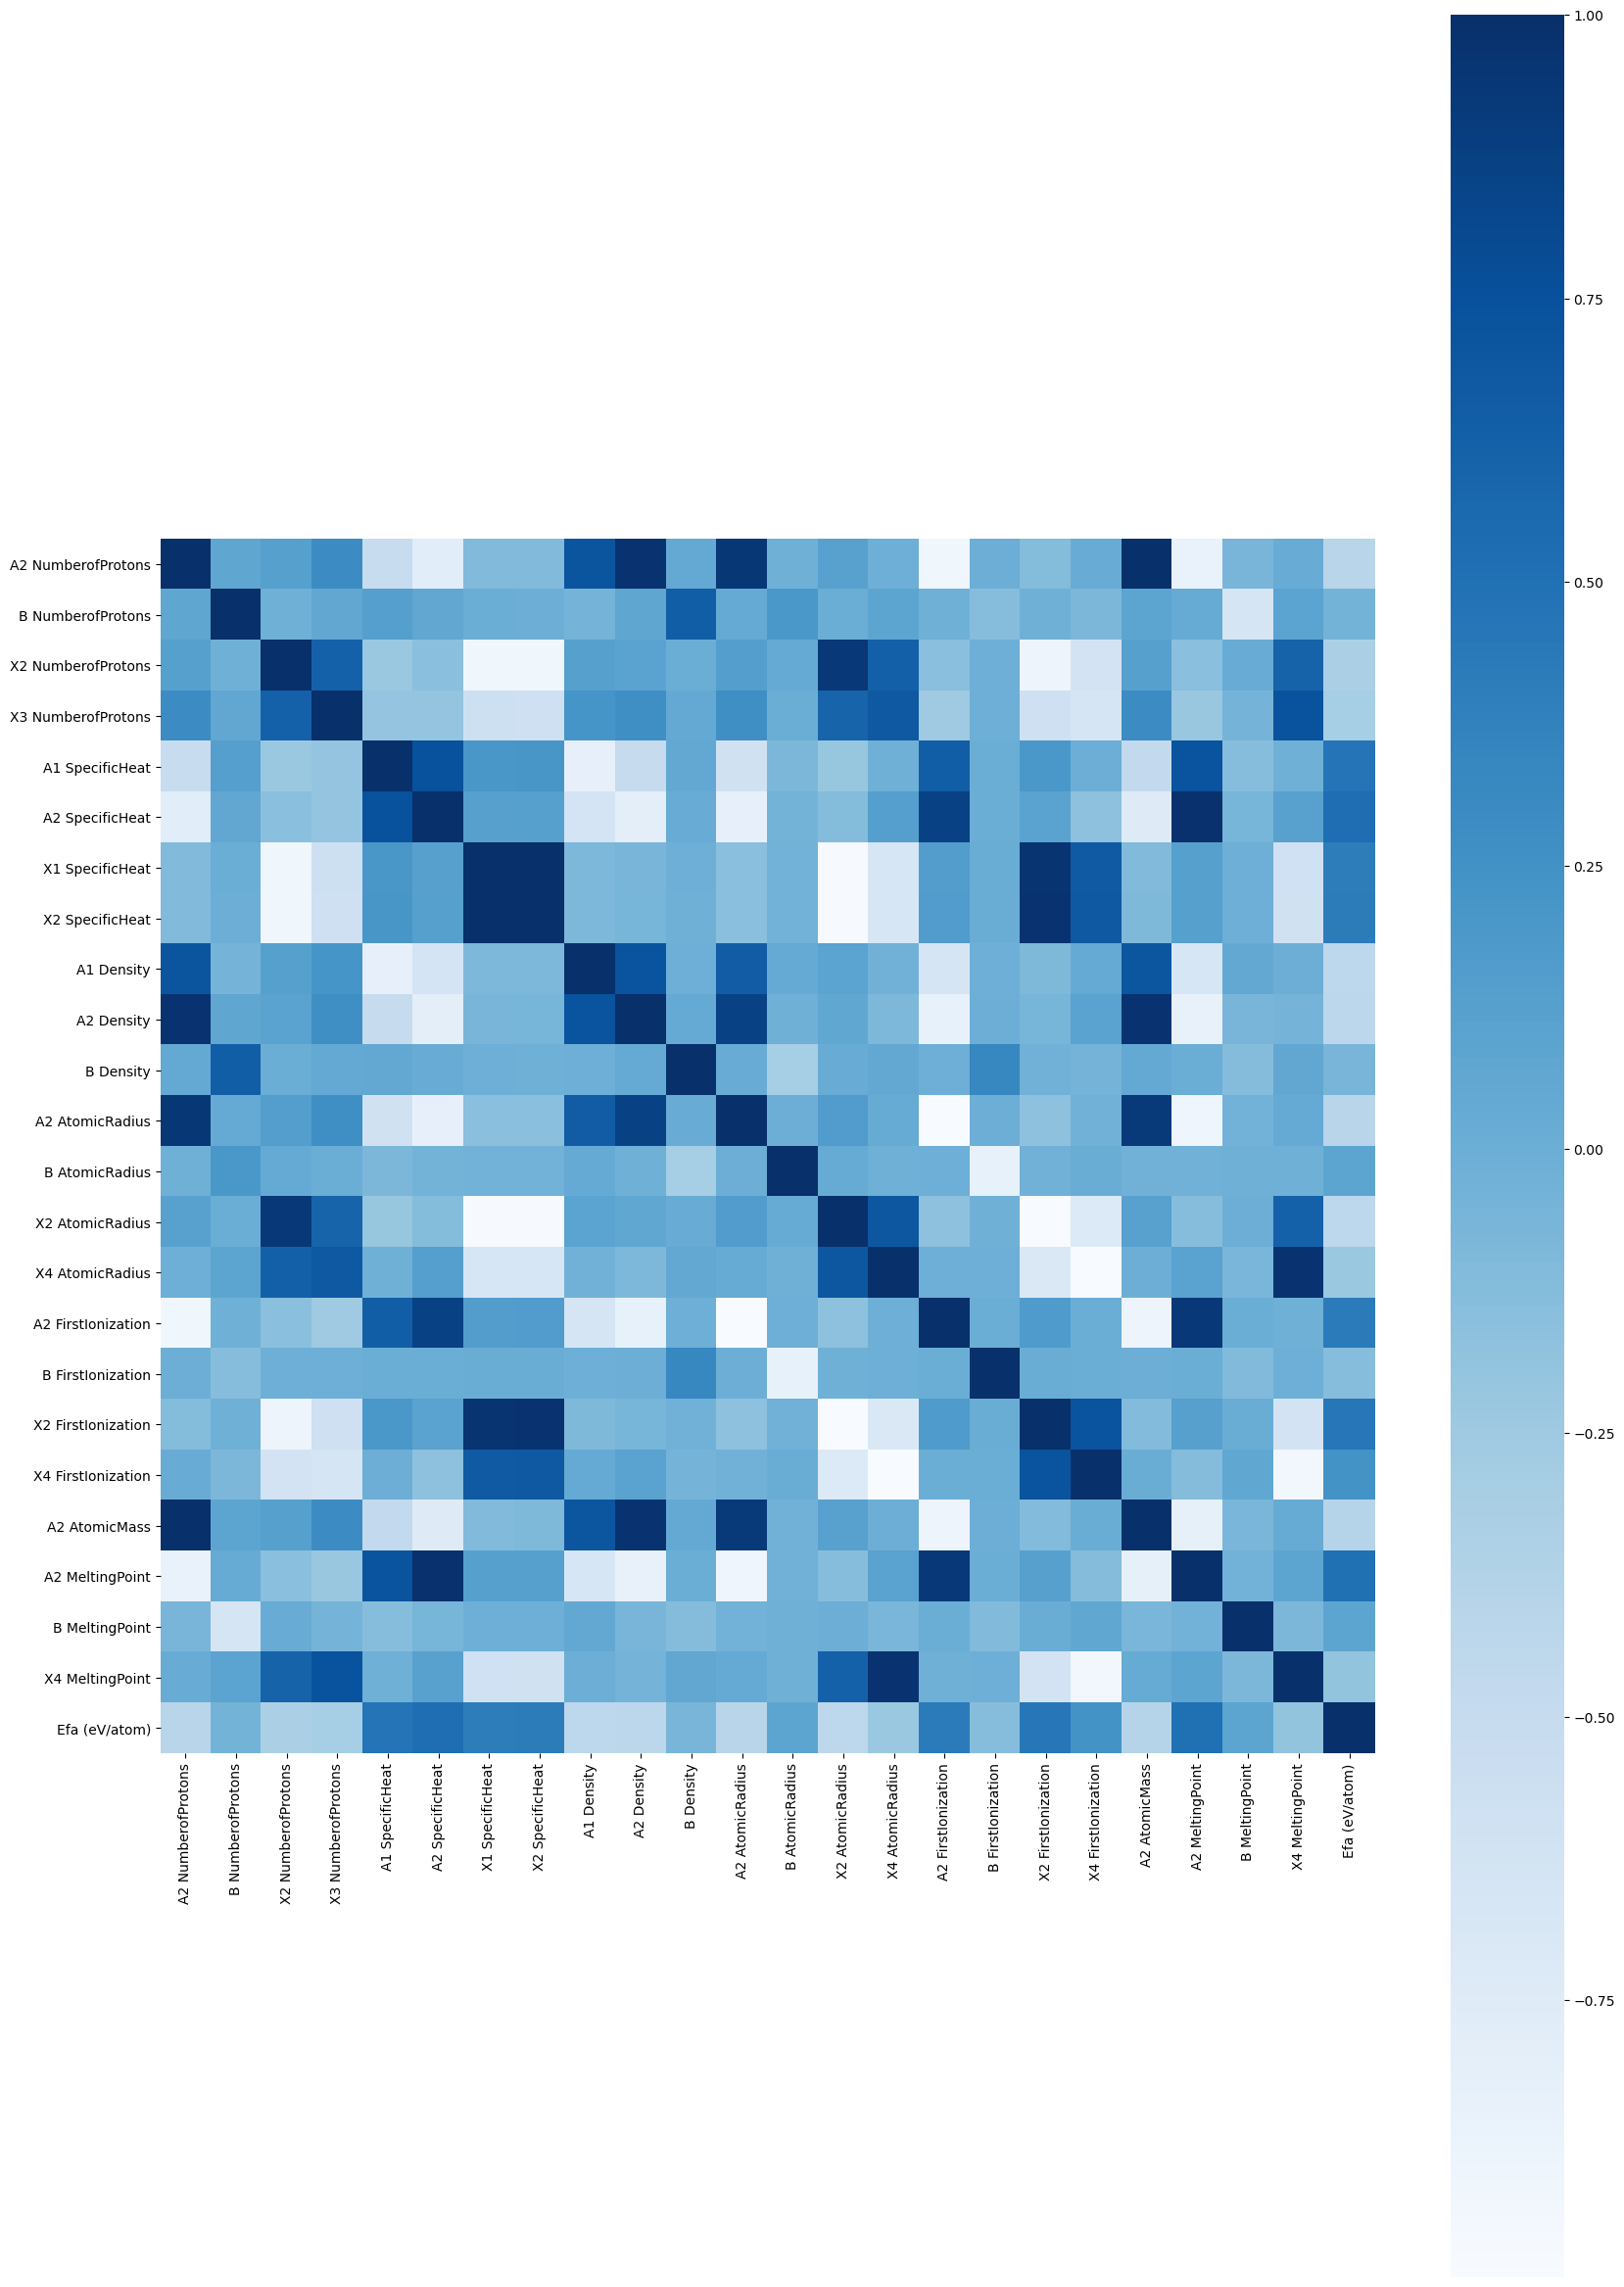

In [7]:
dataML.heatmap_afterRFE() 

In [ ]:
dataML.pairplot_afterRFE()#这里画图需要较长时间，请耐心

这个图可以提取科学信息

正相关还是负相关

# 5 重要性排名（皮尔逊系数）
## 5.1 特征选择之前所有特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
A1 SpecificHeat,0.475211
X2 FirstIonization,0.462445
A1 MeltingPoint,0.459693
...,...
A2 Density,-0.431418
X1 AtomicRadius,-0.436009
A1 Density,-0.437098
X2 AtomicRadius,-0.439406


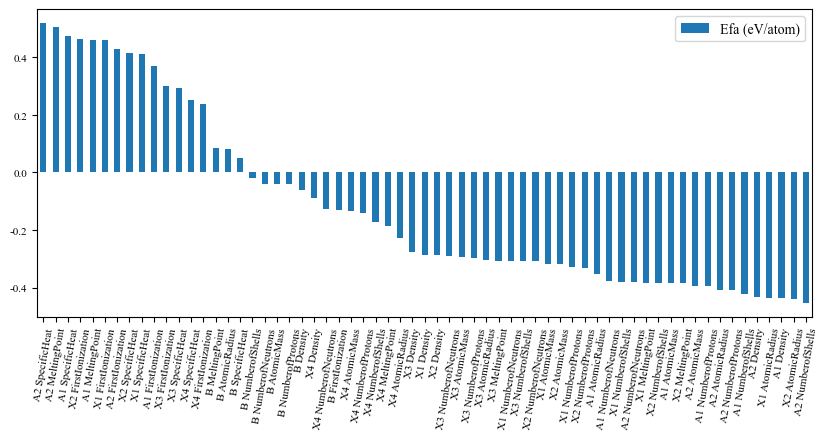

In [10]:
dataML.FeatureImportance_before(80,8,10,4)  #rotation=80, fontsize=8, figure_size_xaxis=10,figure_size_yaxis=4

这个图可以提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

## 5.2 特征选择之后的个别特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
A1 SpecificHeat,0.475211
X2 FirstIonization,0.462445
A2 FirstIonization,0.429791
X2 SpecificHeat,0.415926
X1 SpecificHeat,0.412613
X4 FirstIonization,0.238356
B MeltingPoint,0.083589
B AtomicRadius,0.082789


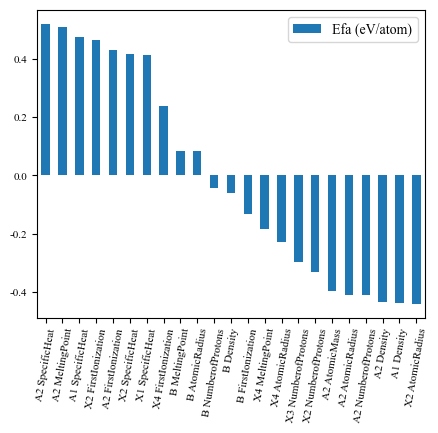

In [11]:
dataML.FeatureImportance_afterRFE(80,12,5,4) #rotation=80, fontsize=12, figure_size_xaxis=5,figure_size_yaxis=4

这个图可以快速提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

# 6 机器学习建模
## 6.1 xgboost建模和准确率画图
### 6.1.1 xgboost默认超参数建模画图
#### (n_estimators=2000, max_depth=100, eta=0.1, gamma=0,
#### subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

RMSE: 0.16662045470967382
MAE: 0.1029044089468424
R2: 0.704552676528241
MSE: 0.027762375927658463


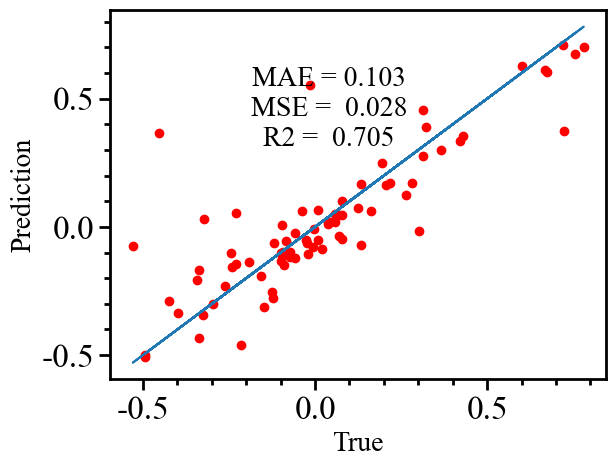

[0.44853005 0.41649048 0.48989245 0.68120425 0.46535105 0.82217841
 0.90773167 0.79002414 0.78593627 0.59848228]


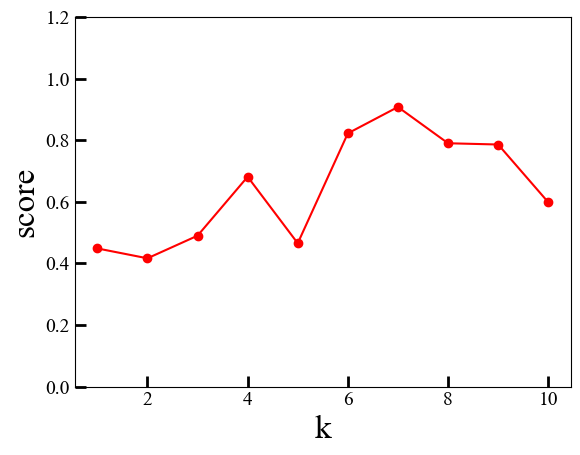

RMSE: 0.000832339798625797
MAE: 0.0006250524049917674
R2: 0.9999934885585947
MSE: 6.927895403764323e-07


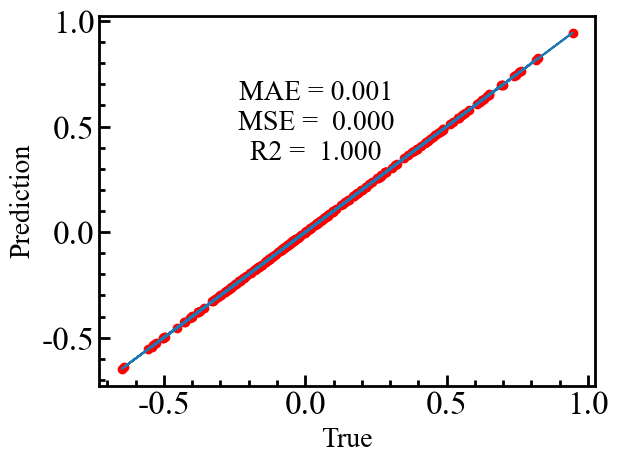

In [12]:
dataML.xgboost_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.1.2 xgboost自己修改超参数, 建模
画图得到拟合图以及交叉验证图
(n_estimators=2000xxx, max_depth=100xxx, eta=0.1xxx, gamma=0xxx,
subsample=0.9xxx, colsample_bytree=0.9xxx, learning_rate=0.2xxx)

RMSE: 0.15999759954997247
MAE: 0.1013347534243067
R2: 0.7275728649379363
MSE: 0.02559923186175335


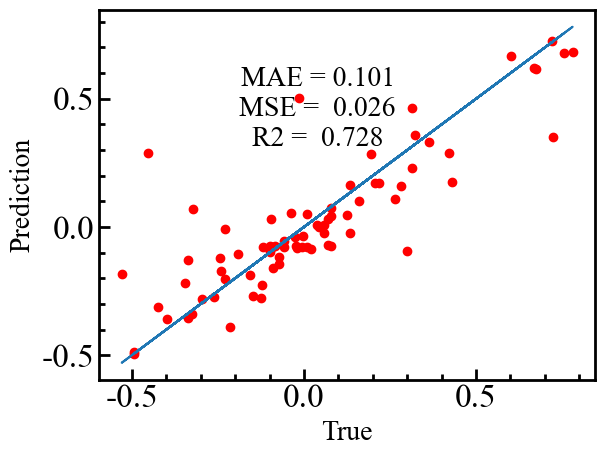

[0.43254738 0.41615025 0.48704233 0.69482372 0.44270871 0.7962849
 0.89502552 0.81274995 0.79993587 0.62647364]


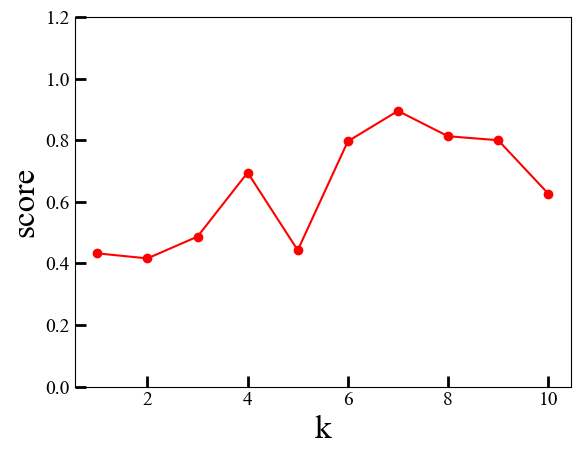

RMSE: 0.0009120081619029724
MAE: 0.0006539176814717808
R2: 0.999992182403251
MSE: 8.317588873776384e-07


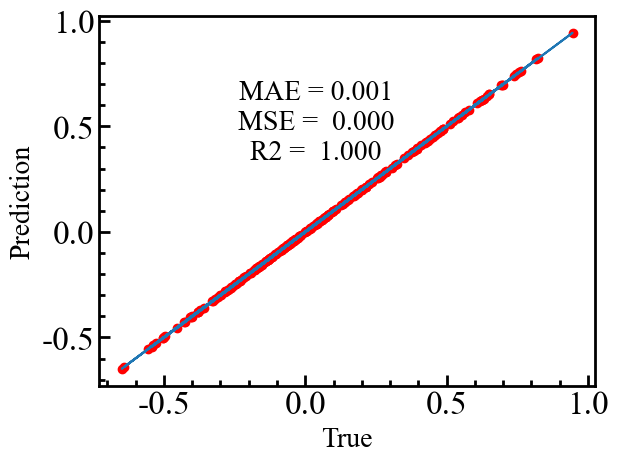

In [14]:
dataML.xgboost_modify(1000,100,0.2,0,0.9,0.8,0.2) #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0, subsample=0.9, colsample_bytree=0.8, learning_rate=0.2)
#这里可以自己更改超参数，play with it, 观察准确率是否提升

第一个拟合图是基于测试集。
RMSE: 0.055163274701856106
MAE: 0.03133570165011043
R2: 0.8083609244543635
MSE: 0.0030429868758324375
上述为误差，相比于真实目标数值还行。
r2越大越好，这里也还行

第二个交叉验证图为10折交叉验证，准确率为不同k的准确率，大致看到大部分score接近1，平均score>0.8甚至>0.9, 因此10折交叉验证准确率还行。这里的score是R2。

### 6.1.3 xgboostRandomSearchCV随机超参数, 建模并观察准确率

In [ ]:
# dataML.xgboost_RandomSearchCV() 

#比较慢，尤其是交叉验证，请耐心等待

#     param_distribs = {
#         'n_estimators': range(80, 200, 4),
#         'max_depth': range(2, 15, 1),
#         'learning_rate': np.linspace(0.01, 2, 20),
#         'subsample': np.linspace(0.7, 0.9, 20),
#         'colsample_bytree': np.linspace(0.5, 0.98, 10),
#         'min_child_weight': range(1, 9, 1)
#          n_iter=300

### 6.1.4 xgboost SearchCV网格搜索（并非随机）寻找最优超参数, 建模并观察准确率

In [ ]:
# dataML.xgboost_GridSearchCV() #非常慢，请耐心等待


#  这里暂时设置的参数与RandomSearch一样，后面更能需要更新
#     param_distribs = {
#         'n_estimators': range(80, 200, 4),
#         'max_depth': range(2, 15, 1),
#         'learning_rate': np.linspace(0.01, 2, 20),
#         'subsample': np.linspace(0.7, 0.9, 20),
#         'colsample_bytree': np.linspace(0.5, 0.98, 10),
#         'min_child_weight': range(1, 9, 1)
#          n_iter=300

## 6.2 Random forest 随机森林建模画图
### 6.2.1 Random forest 默认超参数建模画图

RMSE: 0.18284620848212302
MAE: 0.12206912678948054
R2: 0.6442086808289819
MSE: 0.03343273595628799


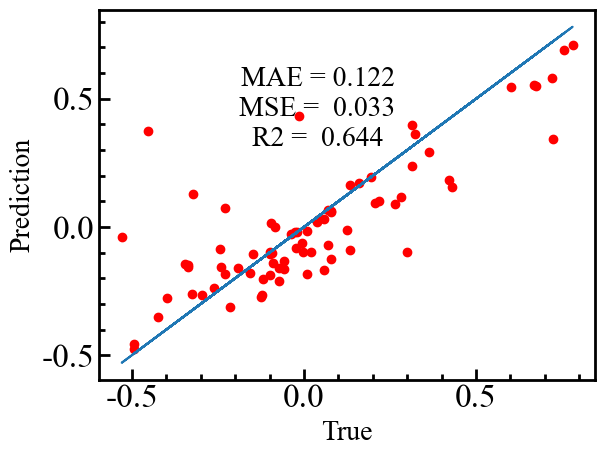

[0.57254509 0.54758775 0.54345166 0.62764101 0.43397911 0.73813691
 0.92513399 0.82177832 0.80869806 0.4352087 ]


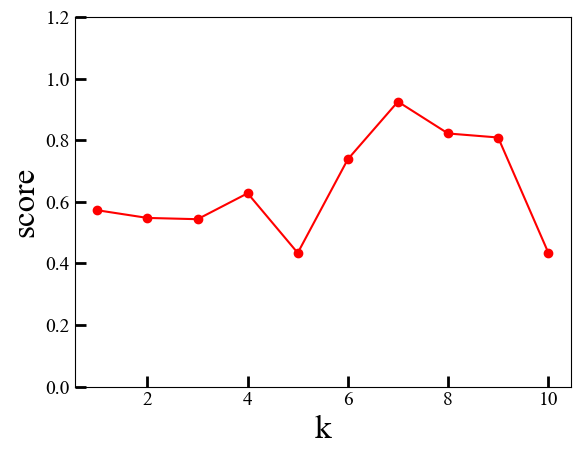

RMSE: 0.06773488867590619
MAE: 0.04526291319798246
R2: 0.9568778250313651
MSE: 0.004588015143937404


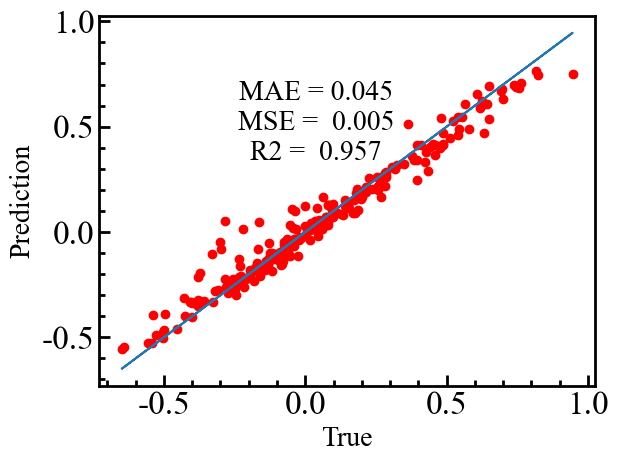

In [15]:
dataML.RandomForest_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.2.2 Random forest 自己修改超参数建模画图

RMSE: 0.19175708949513842
MAE: 0.1366484863
R2: 0.6086851872286979
MSE: 0.03677078137164652


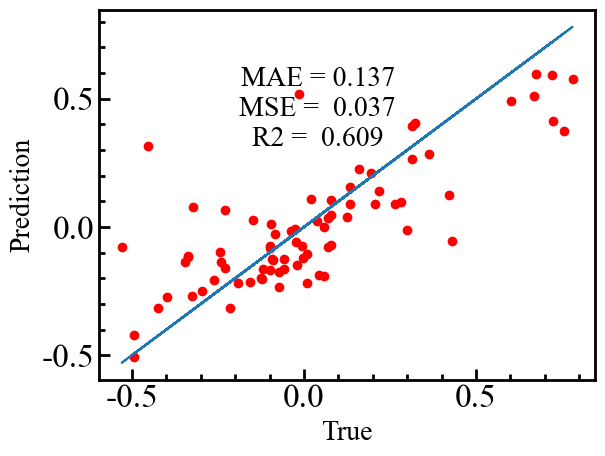

[0.59672034 0.40624057 0.63017744 0.76097086 0.3826779  0.7447257
 0.90157966 0.70774889 0.82098642 0.55009464]


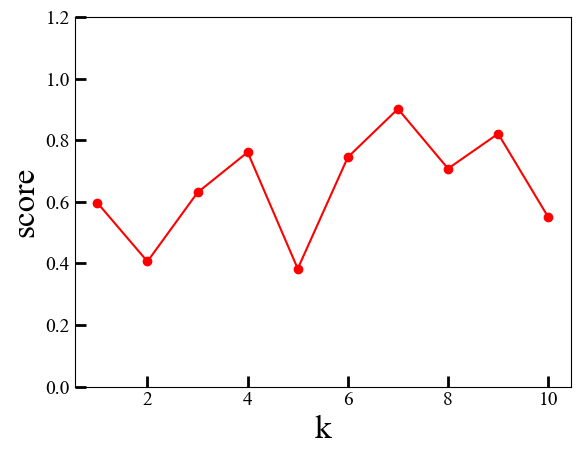

RMSE: 0.0817188205253836
MAE: 0.0493741267504386
R2: 0.9372346443476222
MSE: 0.006677965628059855


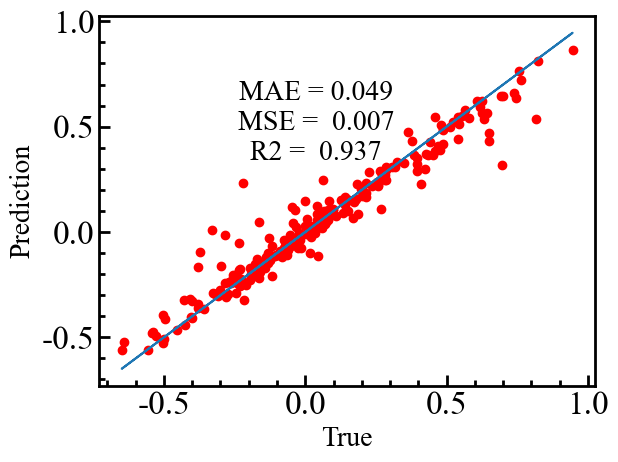

In [16]:
dataML.RandomForest_modify(20, 0.3, 2, 10, 10) # max_depth=20, max_features=0.3, min_samples_split=2, n_estimators=10, random_state=10 可以自己修改

### 6.2.3 Random forest RandomSearchCV 随机搜索超参数建模画图
param_distribs = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [130, 180, 230]}
           
RandomizedSearchCV(clf, param_distribs, n_iter=300, cv=10, scoring='neg_mean_squared_error')

In [ ]:
# dataML.RandomForest_RandomSearchCV()  #需要很长时间

## 6.3  Bagging建模画图
### 6.3.1  Bagging 默认建模画图

RMSE: 0.19743686339353306
MAE: 0.1362013385272727
R2: 0.5851606786086616
MSE: 0.03898131502667663


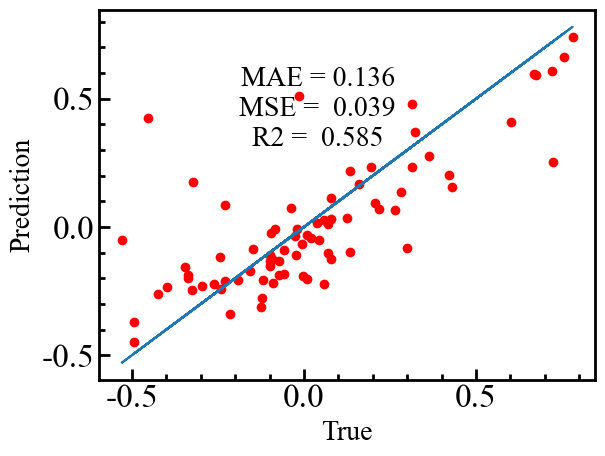

[0.47953197 0.48361826 0.43634193 0.46885353 0.57504391 0.63009813
 0.91935102 0.80996864 0.73941868 0.37412528]


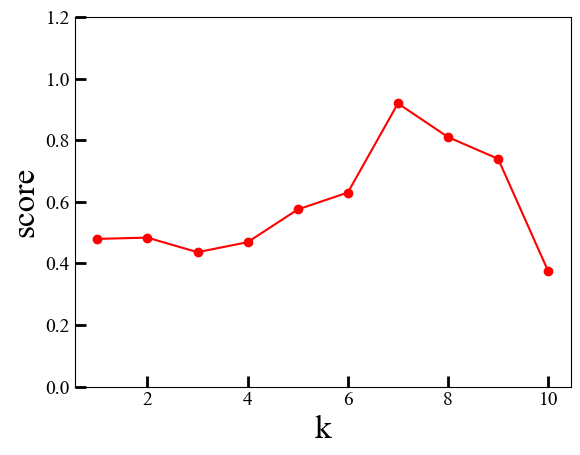

RMSE: 0.08137140781179084
MAE: 0.05316406452105263
R2: 0.9377671809496909
MSE: 0.006621306009272774


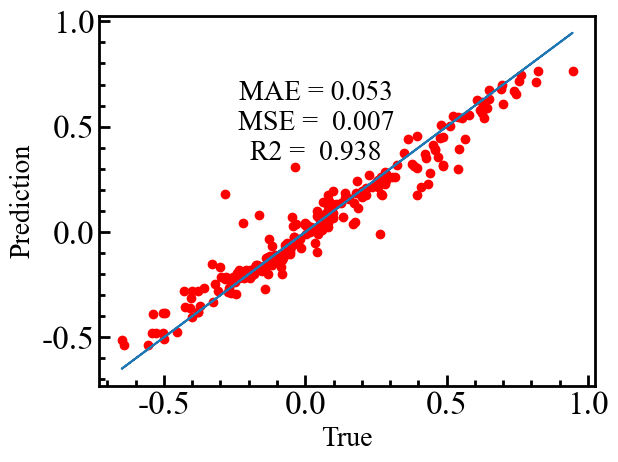

In [17]:
dataML.Bagging_default()

## 6.4  AdaBoost建模画图
### 6.4.1  AdaBoost默认建模画图

RMSE: 0.19951635054737313
MAE: 0.15708891704715836
R2: 0.5763761392362277
MSE: 0.039806774135742275


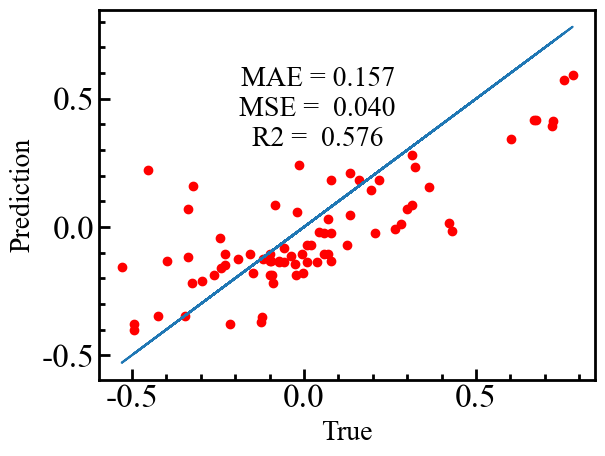

[0.48192083 0.48591875 0.38209356 0.55606156 0.37411709 0.67936843
 0.8507601  0.71369868 0.75457263 0.52671909]


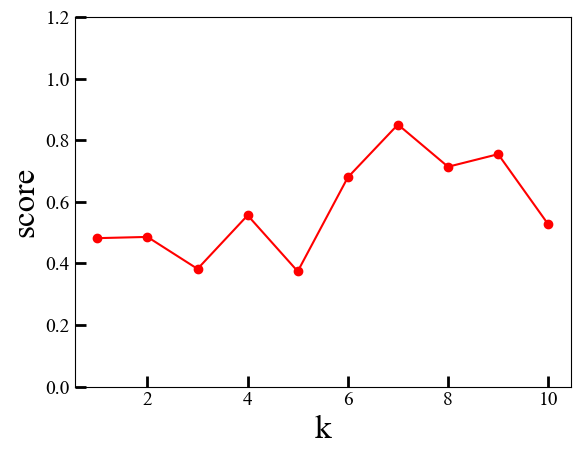

RMSE: 0.1565145906343988
MAE: 0.13088165197236365
R2: 0.7697575096810773
MSE: 0.02449681708145344


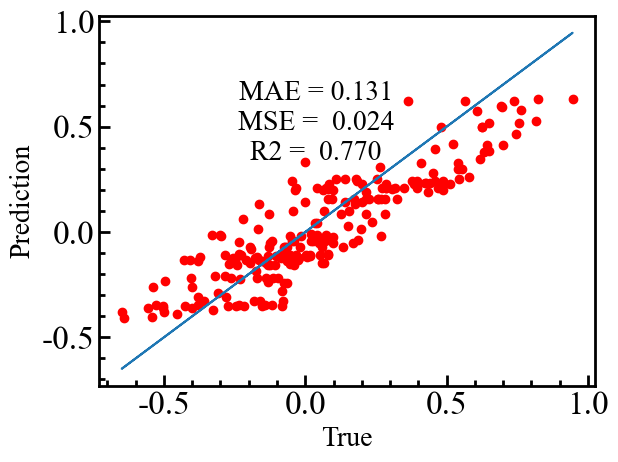

In [18]:
dataML.AdaBoost_default()

## 6.5  GradientBoosting建模画图
### 6.5.1  GradientBoosting默认建模画图

In [ ]:
dataML.GradientBoosting_default()

## 6.6 ExtraTree建模画图
### 6.6.1 ExtraTree默认建模画图

In [ ]:
dataML.ExtraTree_default()

## 6.7 svm建模画图
### 6.7.1 svm默认建模画图

In [ ]:
dataML.svm_default()

## 6.8 DecisionTree建模画图
### 6.8.1 DecisionTree默认建模画图

In [ ]:
dataML.DecisionTree_default()

## 6.9 LinearRegression建模画图
### 6.9.1 LinearRegression默认建模画图

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


RMSE: 990392406.633653
MAE: 112865689.74791165
R2: -1.0438498500745087e+19
MSE: 9.808771191175992e+17


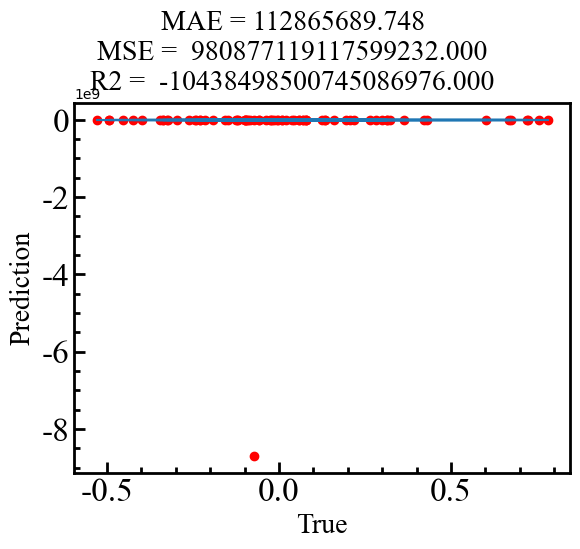

[0.5496206  0.45331294 0.47180461 0.59867006 0.23771104 0.58852047
 0.71645717 0.56523264 0.77771408 0.5052773 ]


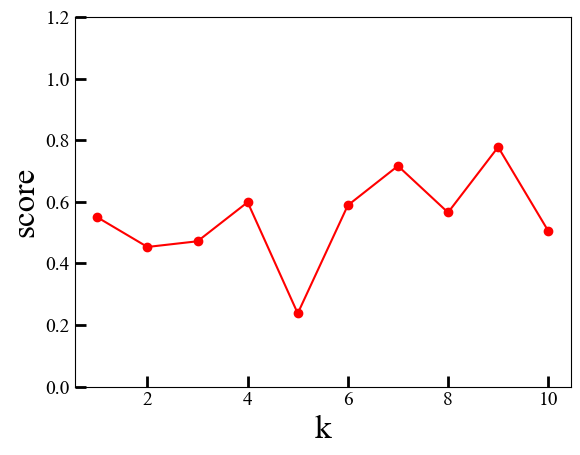

RMSE: 0.1939090932397766
MAE: 0.1455484162145011
R2: 0.6465954263677622
MSE: 0.03760073644107237


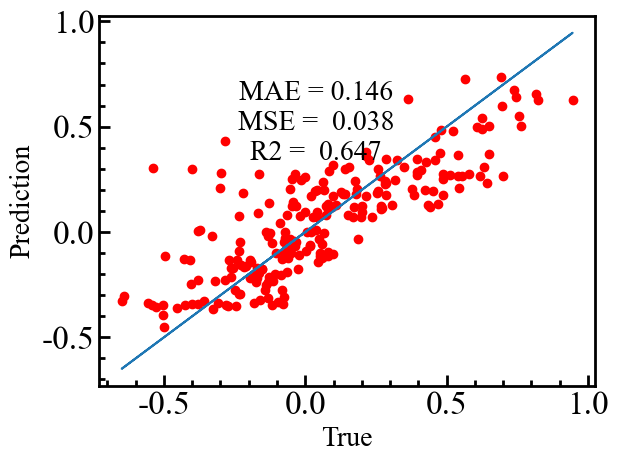

In [19]:
dataML.LinearRegression_default()

In [ ]:
## 6.10 Ridge建模画图
### 6.10.1 Ridge默认建模画图

RMSE: 0.23384566626162026
MAE: 0.17510632907525983
R2: 0.41805481281341694
MSE: 0.054683795629341087


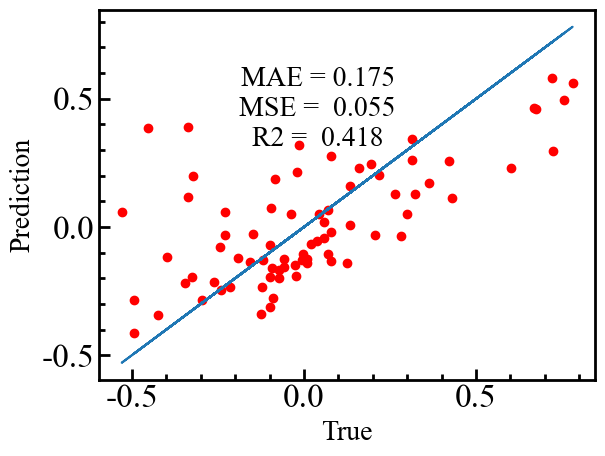

[0.54275047 0.39232578 0.43628671 0.65288695 0.32973112 0.55722585
 0.70053008 0.55484605 0.7890635  0.51742936]


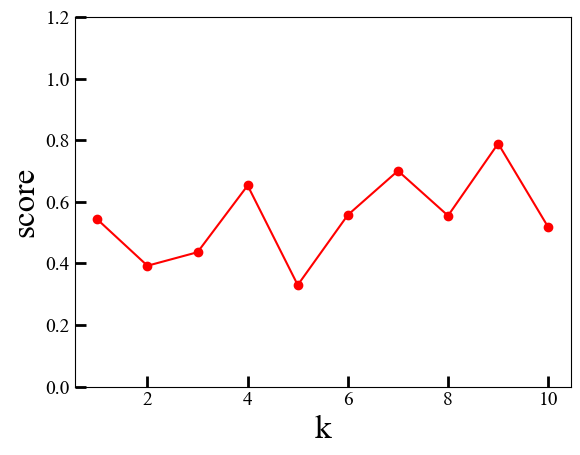

RMSE: 0.19828923818217012
MAE: 0.15152240472061387
R2: 0.6304492371306396
MSE: 0.039318621978865397


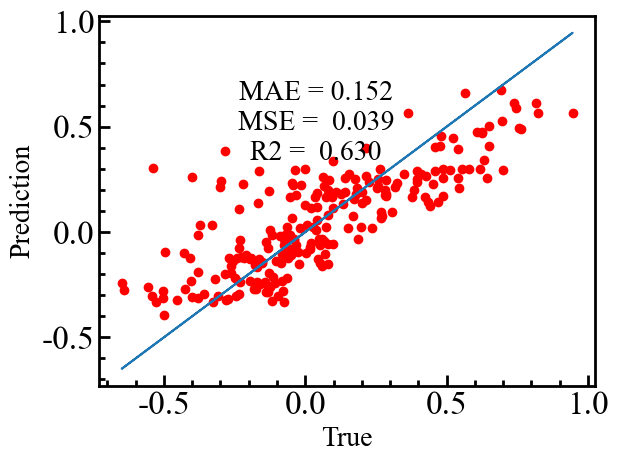

In [20]:
dataML.Ridge_default()

## 6.11 MLP建模画图
### 6.11.1 MLP默认建模画图

RMSE: 0.22506823532700462
MAE: 0.1606628441543652
R2: 0.46092171143765404
MSE: 0.050655710553211934


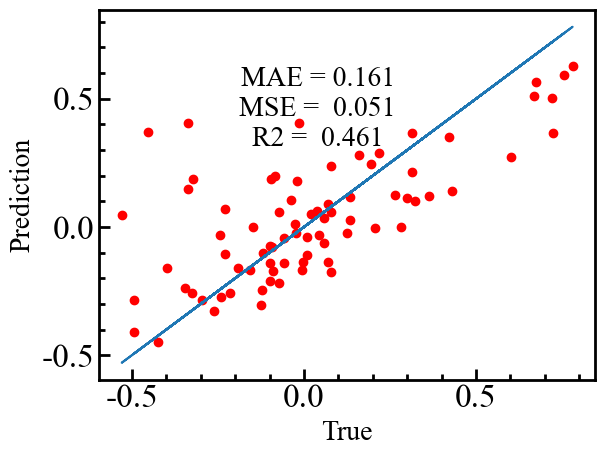

[0.49306167 0.40777408 0.32791205 0.65535048 0.37510296 0.49705013
 0.62949806 0.53423355 0.77184766 0.42033291]


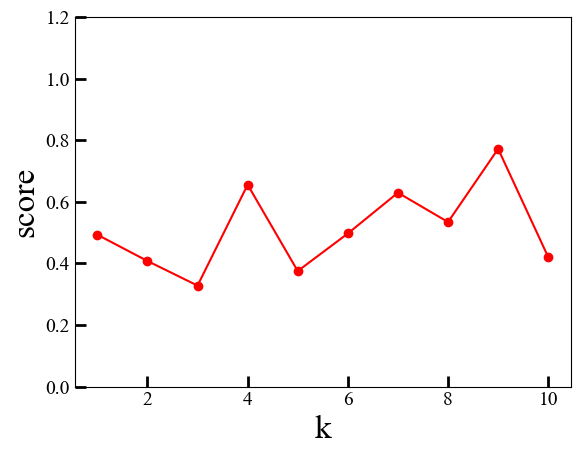

RMSE: 0.17592538632626695
MAE: 0.1282407306147042
R2: 0.7091072874309978
MSE: 0.03094974155404627


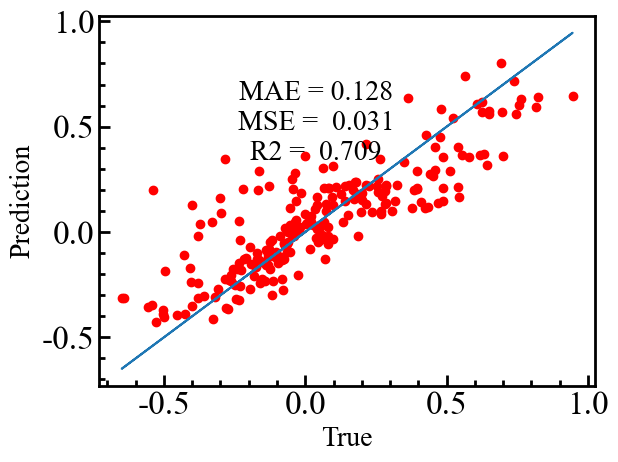

In [21]:
dataML.MLP_default()

### 6.11.2 MLP_modify手动修改超参数建模画图

RMSE: 0.26131519517681834
MAE: 0.17296587442806416
R2: 0.2733040201191138
MSE: 0.06828563123029867


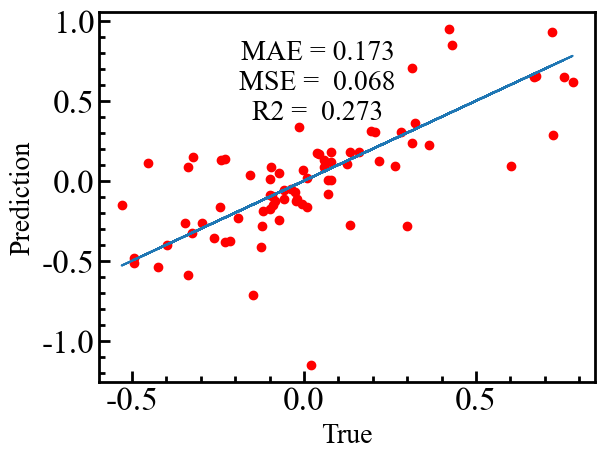

[-0.42187176  0.28052825  0.4510585   0.25601394  0.08547824  0.4663423
  0.88174078  0.6061132   0.12589902  0.49899537]


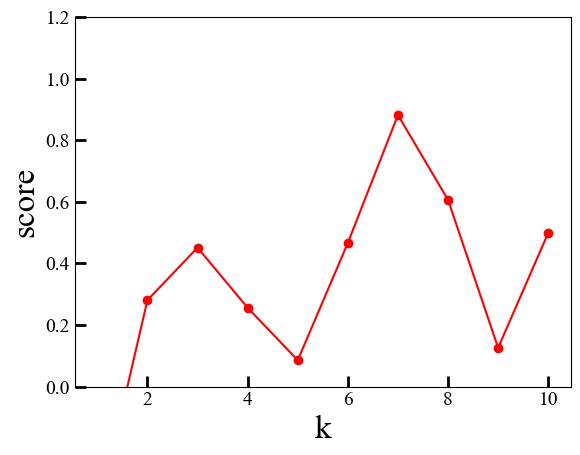

RMSE: 0.00879069272284977
MAE: 0.0044242216795015495
R2: 0.9992736900162903
MSE: 7.727627854756392e-05


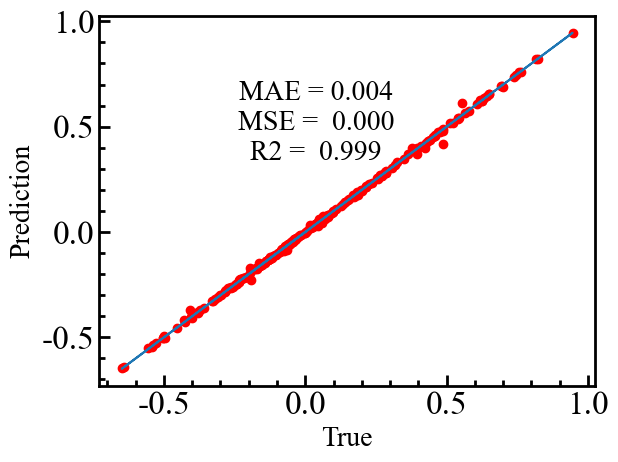

In [22]:
dataML.MLP_modify(0.01,0.0001,200000,200,200)
# #   MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01, alpha=0.0001, max_iter=200000, hidden_layer_sizes=(200, 200))

比较上述算法，选取最准确的机器学习模型

# 7. 简单的预测集建立

In [23]:
dataML.xgboost_modify_predict(1000,200,0.2,0,0.9,0.8,0.2,'x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# 目前只有 xgboost_modify

new features dataset:            0         1         2         3         4         5         6  \
0 -1.175328 -0.161108 -3.745942 -0.321212 -0.282200 -0.086935 -0.412472   
1 -0.881658 -0.065658 -0.235783 -1.771288  0.070207 -0.902117 -0.344625   
2  1.849925 -0.730325 -0.640299  1.007572 -0.052255 -0.013523 -1.390677   
3  0.649963  0.018096 -1.847483 -0.212325 -1.173959  0.016976 -0.789440   
4  0.060732 -1.871654  0.737515 -0.589024 -2.614177  0.435844  1.123998   

          7         8         9  ...        13        14        15        16  \
0 -0.048654 -1.245132 -1.364781  ...  1.668454  0.712043 -1.105737  1.044652   
1  0.240097 -1.136606 -0.520027  ... -0.864585 -1.832277  0.046192 -0.458767   
2  0.089617  1.437003 -0.350448  ...  0.176062 -0.796953 -1.513023 -0.894258   
3 -0.678659  0.216661  0.086193  ... -0.940643  1.332236  0.360422  0.648495   
4  1.030371 -1.785119  0.005520  ... -0.218939 -0.519476 -0.540805 -1.177905   

         17        18        19        20    

这里生成了新的预测数据集New_prediction_total.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

# 8 描述符导入 
## 8.1 有机分子描述符导入（NJmatML提供了pydel描述符和rdkit描述符）
### 8.1.1  pydel描述符

In [24]:
!pip install padelpy
from padelpy import from_smiles
# calculate molecular descriptors for propane
CCC_descriptors = from_smiles('CCC')
print(CCC_descriptors)
print(CCC_descriptors['nAcid'])
print(CCC_descriptors['ALogP'])
print(CCC_descriptors['ALogp2'])

# z.iloc[0,0] = CCC_descriptors['nAcid']

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
{'nAcid': '0', 'ALogP': '-0.1853999999999998', 'ALogp2': '0.034373159999999923', 'AMR': '14.709', 'apol': '10.614344000000001', 'naAromAtom': '0', 'nAromBond': '0', 'nAtom': '11', 'nHeavyAtom': '3', 'nH': '8', 'nB': '0', 'nC': '3', 'nN': '0', 'nO': '0', 'nS': '0', 'nP': '0', 'nF': '0.0', 'nCl': '0.0', 'nBr': '0.0', 'nI': '0.0', 'nX': '0.0', 'ATS0m': '440.92087500000014', 'ATS1m': '385.3849459999999', 'ATS2m': '272.44744900000023', 'ATS3m': '84.835296', 'ATS4m': '9.144576', 'ATS5m': '0.0', 'ATS6m': '0.0', 'ATS7m': '0.0', 'ATS8m': '0.0', 'ATS0v': '1519.2206606954308', 'ATS1v': '1764.9267344628088', 'ATS2v': '1788.4692764710278', 'ATS3v': '1061.4246313942745', 'ATS4v': '279.75369987837234', 'ATS5v': '0.0', 'ATS6v': '0.0', 'ATS7v': '0.0', 'ATS8v': '0.0', 'ATS0e': '76.36925999999998', 'ATS1e': '72.02208800000001', 'ATS2e': '125.74608399999998', 'ATS3e': '123.32735999999997', 'ATS4e': '60.46617599999999', 'ATS5e': '0.0', 'ATS6e': '

### 8.1.2 rdkit描述符

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


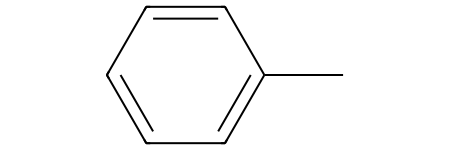

In [25]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
m = Chem.MolFromSmiles('Cc1ccccc1')
m
# m = Chem.MolFromMolFile('EthylRed.mol')

In [ ]:
matminer

## 8.2 无机材料描述符

# 未完待续...（其他机器学习算法，网格搜索，预测集建立，无机和有机描述符填充等等）